In [49]:
import requests
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=ETH&market=ARS&apikey=P7226BKG9ND08BME'



In [56]:


# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key


def getdata(): 
    r = requests.get(url)
    data = r.json()
    df = pd.DataFrame.from_dict(data["Time Series (Digital Currency Daily)"], orient='index')
    df = df.drop(['1a. open (ARS)', '2a. high (ARS)', '3a. low (ARS)', '4a. close (ARS)', '6. market cap (USD)'], axis=1)
    df = df.rename(columns={"1b. open (USD)": "Open", "2b. high (USD)": "High", "3b. low (USD)": 'Low', '4b. close (USD)': 'Close', '5. volume': "Volume"})
    return df


In [83]:


__path__ = "/model/model.keras"
model = keras.models.load_model('/Users/santiagosonzini/Downloads/crypto-main/model/model.keras', compile=False)
model.compile(optimizer="adam",loss="mean_squared_error")
scaler = MinMaxScaler(feature_range=(0,1))

prediction_days = 60

data_full = getdata()
data = data_full[1:60]
total_dataset = pd.concat((data['Close'], data_full['Close']), axis=0)

model_inputs = total_dataset[len(data_full)-len(data)- prediction_days:].values



model_data  = model_inputs.reshape(-1,1)
model_data = scaler.fit_transform(model_data)

x_test = []

for x in range(prediction_days, len(model_data)):
  x_test.append(model_data[x-prediction_days:x,0],)


x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(120, 60, 1)

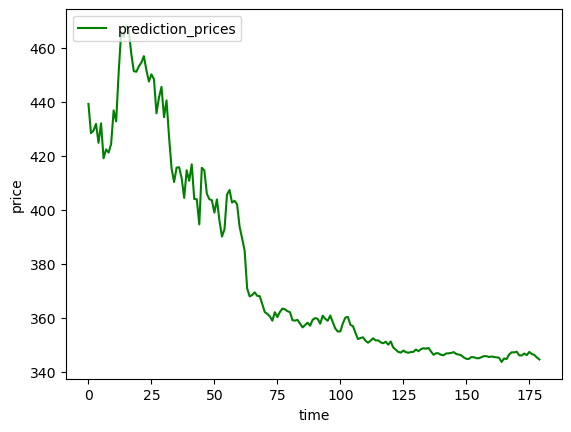

In [85]:
### test data

prediction_prices = model(model_data)

# transformamos a valores normales en este caso los precios
prediction_prices = scaler.inverse_transform(prediction_prices)

plt.plot(prediction_prices, color="green", label="prediction_prices")
plt.xlabel("time")
plt.ylabel('price')
plt.legend(loc="upper left")
plt.show()

In [78]:
prediction_prices.shape

(60, 1)